# PROJECT 2 : MEMPREDIKSI CUACA DI KAB. BANYUWANGI DENGAN METODE LSTM

**NAMA : MOCHAMMAD TOYIB <BR>
NIM : 2121400015 <BR>
MATKUL : DATA MINING & PEMBELAJARAN MESIN**



## PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np

# Membaca file Excel
excel_file = pd.read_excel('/content/dataset_full.xlsx')

# Membuat DataFrame dari data Excel
df = pd.DataFrame(excel_file)

#Menampilkan data
print(df)

         Tanggal    Tn    Tx  Tavg  RH_avg    RR   ss
0     01-01-2019  24.6  31.0  26.7    87.0  32.5  4.0
1     02-01-2019  25.0   NaN   NaN     NaN   0.5  2.4
2     03-01-2019  24.5  31.4  26.0    92.0   7.0  1.6
3     04-01-2019  24.0  30.0  27.0    88.0   6.5  0.0
4     05-01-2019  23.8  30.3  27.9    86.0  31.5  3.6
...          ...   ...   ...   ...     ...   ...  ...
1970  24-05-2024  25.5  30.9  27.9    83.0   0.2  5.0
1971  25-05-2024  26.0  30.7  27.8    81.0   2.2  7.6
1972  26-05-2024  26.0  30.0  27.5    84.0   3.0  5.5
1973  27-05-2024  26.1   NaN  28.5    81.0   0.4  6.0
1974  28-05-2024   NaN   NaN   NaN     NaN   NaN  NaN

[1975 rows x 7 columns]


In [ ]:
# Membuat DataFrame dari data Excel
df = pd.DataFrame(excel_file)

# Melakukan interpolasi untuk mengisi nilai yang hilang
df_interpolate = df.interpolate()

# Menampilkan DataFrame hasil interpolasi
print(df_interpolate)

         Tanggal    Tn    Tx   Tavg  RH_avg    RR   ss
0     01-01-2019  24.6  31.0  26.70    87.0  32.5  4.0
1     02-01-2019  25.0  31.2  26.35    89.5   0.5  2.4
2     03-01-2019  24.5  31.4  26.00    92.0   7.0  1.6
3     04-01-2019  24.0  30.0  27.00    88.0   6.5  0.0
4     05-01-2019  23.8  30.3  27.90    86.0  31.5  3.6
...          ...   ...   ...    ...     ...   ...  ...
1970  24-05-2024  25.5  30.9  27.90    83.0   0.2  5.0
1971  25-05-2024  26.0  30.7  27.80    81.0   2.2  7.6
1972  26-05-2024  26.0  30.0  27.50    84.0   3.0  5.5
1973  27-05-2024  26.1  30.0  28.50    81.0   0.4  6.0
1974  28-05-2024  26.1  30.0  28.50    81.0   0.4  6.0

[1975 rows x 7 columns]


In [ ]:
# Menyimpan hasil DataFrame setelah interpolasi ke file Excel
df_interpolate.to_excel("dataset_clean.xlsx", index=False)

## MEMBUAT MODEL LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [ ]:
# Membaca file Excel
excel_file = pd.read_excel("dataset_clean.xlsx")
df = pd.DataFrame(excel_file)
print(df)

         Tanggal    Tn    Tx   Tavg  RH_avg    RR   ss
0     01-01-2019  24.6  31.0  26.70    87.0  32.5  4.0
1     02-01-2019  25.0  31.2  26.35    89.5   0.5  2.4
2     03-01-2019  24.5  31.4  26.00    92.0   7.0  1.6
3     04-01-2019  24.0  30.0  27.00    88.0   6.5  0.0
4     05-01-2019  23.8  30.3  27.90    86.0  31.5  3.6
...          ...   ...   ...    ...     ...   ...  ...
1970  24-05-2024  25.5  30.9  27.90    83.0   0.2  5.0
1971  25-05-2024  26.0  30.7  27.80    81.0   2.2  7.6
1972  26-05-2024  26.0  30.0  27.50    84.0   3.0  5.5
1973  27-05-2024  26.1  30.0  28.50    81.0   0.4  6.0
1974  28-05-2024  26.1  30.0  28.50    81.0   0.4  6.0

[1975 rows x 7 columns]


In [ ]:
# Memisahkan fitur input dan output
input_features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']
output_features = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss']
X = df[input_features].values
y = df[output_features].values
print(X)
print(y)

[[24.6  31.   26.7  87.   32.5   4.  ]
 [25.   31.2  26.35 89.5   0.5   2.4 ]
 [24.5  31.4  26.   92.    7.    1.6 ]
 ...
 [26.   30.   27.5  84.    3.    5.5 ]
 [26.1  30.   28.5  81.    0.4   6.  ]
 [26.1  30.   28.5  81.    0.4   6.  ]]
[[24.6  31.   26.7  87.   32.5   4.  ]
 [25.   31.2  26.35 89.5   0.5   2.4 ]
 [24.5  31.4  26.   92.    7.    1.6 ]
 ...
 [26.   30.   27.5  84.    3.    5.5 ]
 [26.1  30.   28.5  81.    0.4   6.  ]
 [26.1  30.   28.5  81.    0.4   6.  ]]


In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
print(y_scaled)

[[5.75000000e-01 1.96012166e-02 3.82716049e-01 7.63157895e-01
  3.65661566e-03 3.38983051e-01]
 [6.25000000e-01 2.02771206e-02 3.39506173e-01 8.28947368e-01
  5.62556256e-05 2.03389831e-01]
 [5.62500000e-01 2.09530247e-02 2.96296296e-01 8.94736842e-01
  7.87578758e-04 1.35593220e-01]
 ...
 [7.50000000e-01 1.62216965e-02 4.81481481e-01 6.84210526e-01
  3.37533753e-04 4.66101695e-01]
 [7.62500000e-01 1.62216965e-02 6.04938272e-01 6.05263158e-01
  4.50045005e-05 5.08474576e-01]
 [7.62500000e-01 1.62216965e-02 6.04938272e-01 6.05263158e-01
  4.50045005e-05 5.08474576e-01]]


In [ ]:
# Pembagian data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

In [ ]:
timesteps = 30  # Menggunakan data 30 hari sebelumnya menjadi input LSTM
n_features_input = len(input_features)
n_features_output = len(output_features)

In [ ]:
# Membuat urutan data
def create_sequences(X, y, time_steps):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i : i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

In [ ]:
# Membangun model LSTM
model = Sequential()
model.add(LSTM(60, input_shape=(timesteps, n_features_input), return_sequences=True))
model.add(LSTM(60))
model.add(Dense(n_features_output))
model.compile(optimizer='adam', loss='mae')

# Menyimpan model ke dalam variabel his
his = model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

Epoch 1/50
49/49 [==============================] - 5s 31ms/step - loss: 0.1353
Epoch 2/50
49/49 [==============================] - 2s 48ms/step - loss: 0.0956
Epoch 3/50
49/49 [==============================] - 2s 37ms/step - loss: 0.0927
Epoch 4/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0909
Epoch 5/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0903
Epoch 6/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0891
Epoch 7/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0874
Epoch 8/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0877
Epoch 9/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0868
Epoch 10/50
49/49 [==============================] - 2s 45ms/step - loss: 0.0856
Epoch 11/50
49/49 [==============================] - 2s 45ms/step - loss: 0.0855
Epoch 12/50
49/49 [==============================] - 1s 30ms/step - loss: 0.0834
Epoch 13/50
49/49 [==================

In [ ]:
# Melakukan prediksi
predictions = model.predict(X_test_seq)
predictions = scaler.inverse_transform(predictions)
y_test_asli = scaler.inverse_transform(y_test_seq)
mae = np.mean(np.abs(predictions - y_test_asli), axis=0)

12/12 [==============================] - 1s 10ms/step


In [ ]:
# Menampilkan MAE untuk masing-masing fitur
for i, feature in enumerate(output_features):
    print(f"MAE untuk fitur {feature}: {mae[i]}")

MAE untuk fitur Tn: 0.6314258742659062
MAE untuk fitur Tx: 2.014702002120346
MAE untuk fitur Tavg: 0.5264052550433433
MAE untuk fitur RH_avg: 3.0859296406785104
MAE untuk fitur RR: 783.2418426439715
MAE untuk fitur ss: 1.4280718809720048


In [ ]:
# Menghitung threshold MAE
threshold_mae_Tn = (df['Tn'].max() - df['Tn'].min()) * 10 / 100
threshold_mae_Tx = (df['Tx'].max() - df['Tx'].min()) * 10 / 100
threshold_mae_Tavg = (df['Tavg'].max() - df['Tavg'].min()) * 10 / 100
threshold_mae_RH_avg = (df['RH_avg'].max() - df['RH_avg'].min()) * 10 / 100
threshold_mae_RR = (df['RR'].max() - df['RR'].min()) * 10 / 100
threshold_mae_ss = (df['ss'].max() - df['ss'].min()) * 10 / 100

print(f"Threshold Tn: {threshold_mae_Tn}")
print(f"Threshold Tx: {threshold_mae_Tx}")
print(f"Threshold Tavg: {threshold_mae_Tavg}")
print(f"Threshold RH_avg: {threshold_mae_RH_avg}")
print(f"Threshold RR: {threshold_mae_RR}")
print(f"Threshold ss: {threshold_mae_ss}")

Threshold Tn: 0.8
Threshold Tx: 29.590000000000003
Threshold Tavg: 0.8099999999999997
Threshold RH_avg: 3.8
Threshold RR: 888.8
Threshold ss: 1.18


In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Menghitung MAE (contoh nilai, ganti dengan perhitungan MAE yang sebenarnya)
mae = [0.5443470429720948, 1.721648250214042, 0.4764776768096506, 3.0546312097000747, 793.2480357824845, 1.40572852419936]  # Ini hanya contoh, pastikan Anda menghitung MAE yang sebenarnya

# Menghitung threshold MAE
threshold_mae_Tn = (df['Tn'].max() - df['Tn'].min()) * 10 / 100
threshold_mae_Tx = (df['Tx'].max() - df['Tx'].min()) * 10 / 100
threshold_mae_Tavg = (df['Tavg'].max() - df['Tavg'].min()) * 10 / 100
threshold_mae_RH_avg = (df['RH_avg'].max() - df['RH_avg'].min()) * 10 / 100
threshold_mae_RR = (df['RR'].max() - df['RR'].min()) * 10 / 100
threshold_mae_ss = (df['ss'].max() - df['ss'].min()) * 10 / 100

# Membuat DataFrame untuk menampilkan MAE dan Threshold
mae_threshold_data = {
    'Pengukuran': ['MAE', 'Threshold'],
    'Tn': [mae[0], threshold_mae_Tn],
    'Tx': [mae[1], threshold_mae_Tx],
    'Tavg': [mae[2], threshold_mae_Tavg],
    'RH_avg': [mae[3], threshold_mae_RH_avg],
    'RR': [mae[4], threshold_mae_RR],
    'ss': [mae[5], threshold_mae_ss]
}

mae_threshold_df = pd.DataFrame(mae_threshold_data)

# Menampilkan DataFrame dengan tampilan HTML yang bagus dan isi tabel di tengah
html_table = mae_threshold_df.to_html(index=False, border=1, justify='center')

display(HTML(html_table))

Pengukuran,Tn,Tx,Tavg,RH_avg,RR,ss
MAE,0.544347,1.721648,0.476478,3.054631,793.248036,1.405729
Threshold,0.800000,29.590000,0.810000,3.800000,888.800000,1.180000


## VISUALISASI & EVALUASI MODEL LSTM

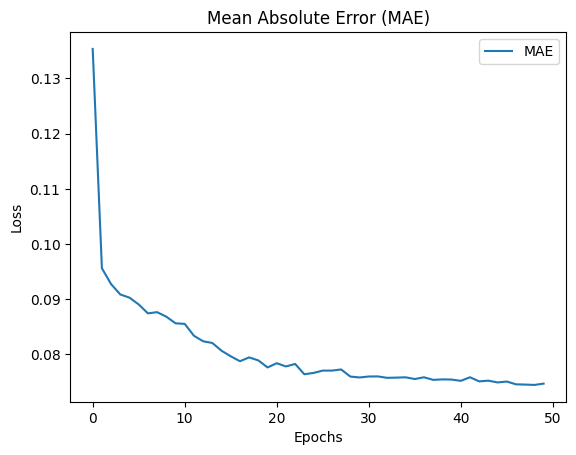

In [ ]:
model_history = his.history
loss = model_history['loss']

plt.figure()
plt.plot(loss, label='MAE')  # Menampilkan grafik Mean Absolute Error (MAE)
plt.title("Mean Absolute Error (MAE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.savefig("MAE.png")
plt.show()

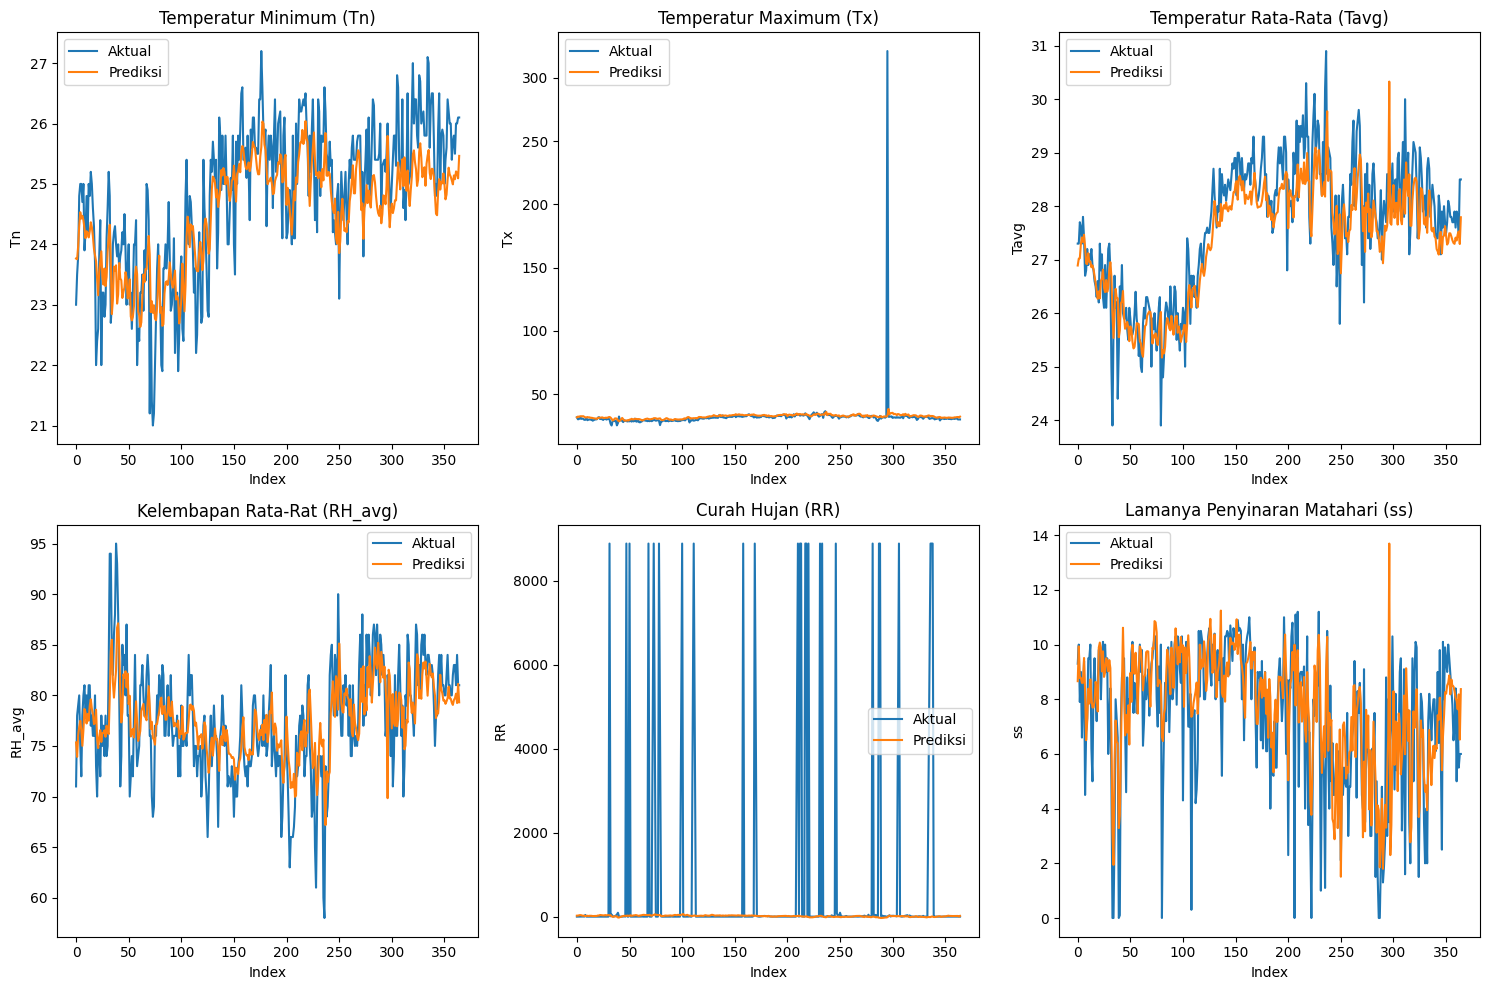

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Membuat 2 baris dan 3 kolom subplot

target_indices = range(6)
titles = [
    "Temperatur Minimum (Tn)", "Temperatur Maximum (Tx)", "Temperatur Rata-Rata (Tavg)",
    "Kelembapan Rata-Rat (RH_avg)", "Curah Hujan (RR)", "Lamanya Penyinaran Matahari (ss)"
]

# Loop untuk membuat plot pada setiap subplot
for i, ax in enumerate(axes.flat):
    ax.plot(y_test_asli[:, target_indices[i]], label="Aktual")  # Menampilkan data aktual
    ax.plot(predictions[:, target_indices[i]], label="Prediksi")  # Menampilkan data prediksi
    ax.set_xlabel("Index")
    ax.set_ylabel(output_features[target_indices[i]])
    ax.set_title(titles[i])
    ax.legend()

plt.tight_layout()
plt.savefig('hasil_plot.png')  # Menyimpan gambar
plt.show()

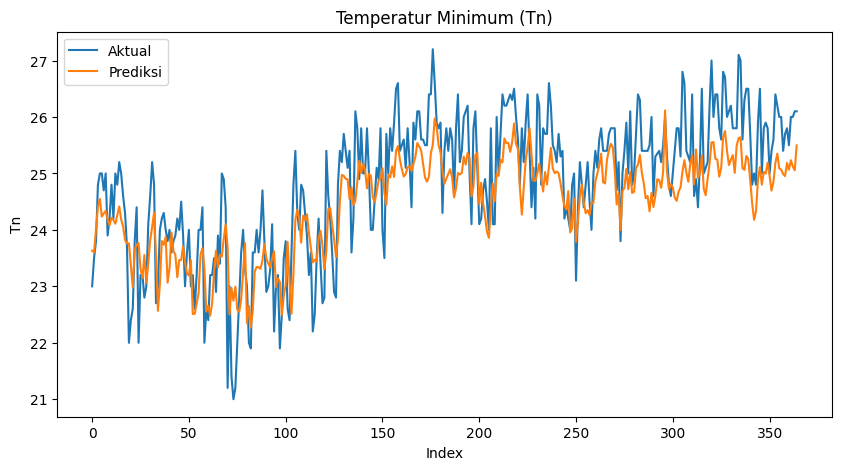

In [ ]:
target_index = 0
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Temperatur Minimum (Tn)")
plt.legend()
plt.show()

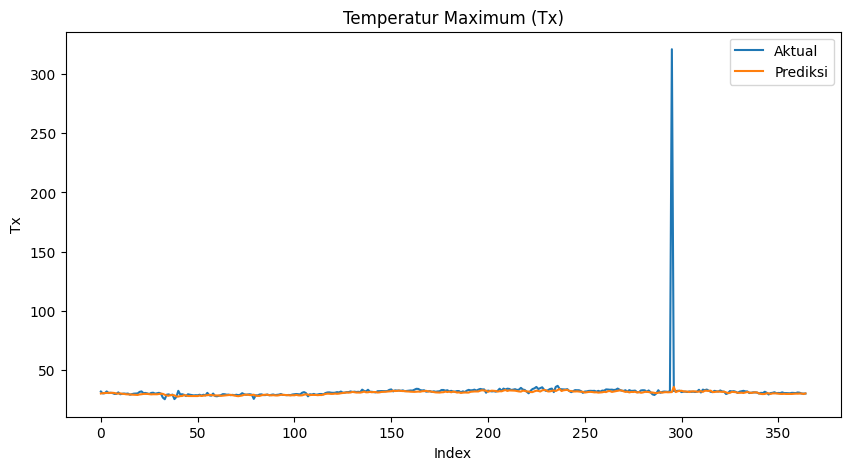

In [ ]:
target_index = 1
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Temperatur Maximum (Tx)")
plt.legend()
plt.show()

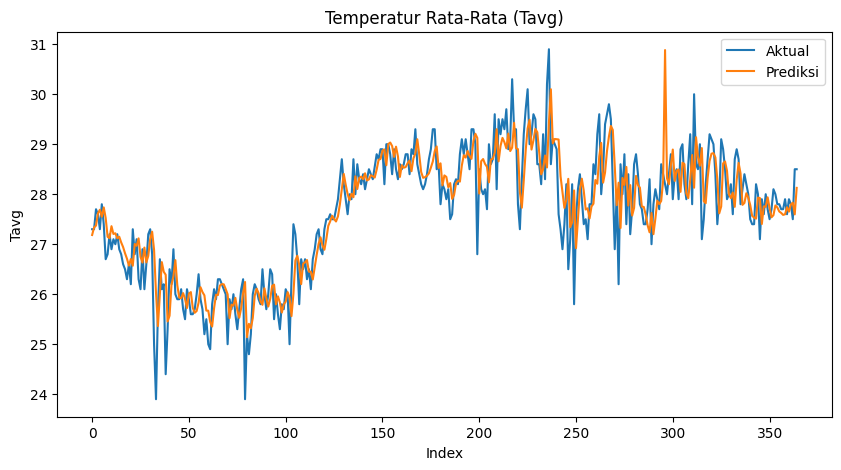

In [ ]:
target_index = 2
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Temperatur Rata-Rata (Tavg)")
plt.legend()
plt.show()

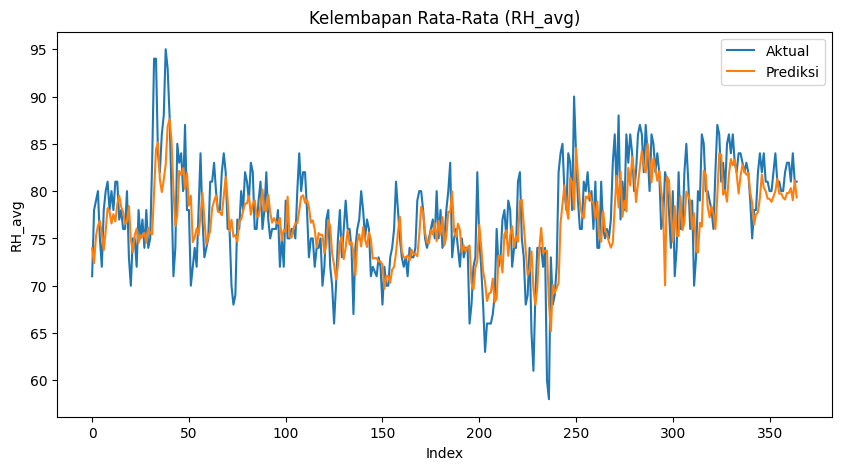

In [ ]:
target_index = 3
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Kelembapan Rata-Rata (RH_avg)")
plt.legend()
plt.show()

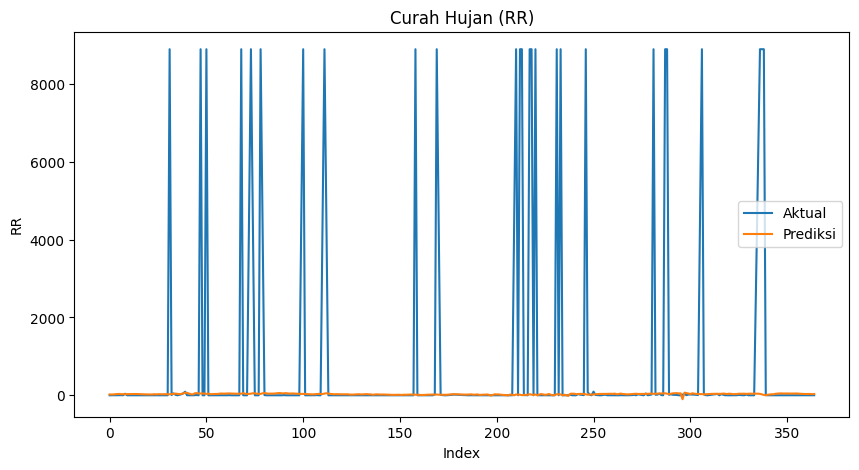

In [ ]:
target_index = 4
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Curah Hujan (RR)")
plt.legend()
plt.show()

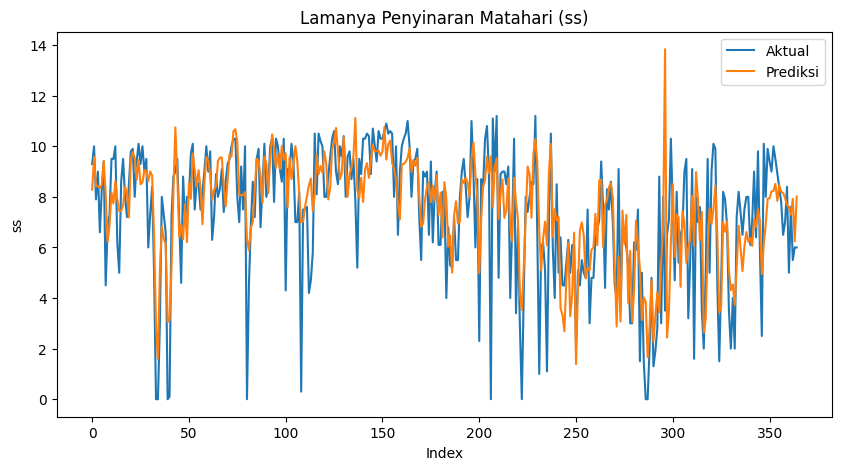

In [ ]:
target_index = 5
plt.figure(figsize=(10, 5))
plt.plot(y_test_asli[:, target_index], label="Aktual")  # Menampilkan data aktual
plt.plot(predictions[:, target_index], label="Prediksi")  # Menampilkan data prediksi
plt.xlabel("Index")
plt.ylabel(output_features[target_index])
plt.title("Lamanya Penyinaran Matahari (ss)")
plt.legend()
plt.show()

## MENGEKSPOR HASIL PREDIKSI

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Inisialisasi daftar nama kolom
output_features = ["Tn", "Tx", "Tavg", "RH_avg", "RR", "ss"]

# Inisialisasi DataFrame kosong untuk menyimpan semua data
all_data_export = pd.DataFrame()

# Loop untuk menambahkan data asli dan prediksi ke DataFrame
for target_index in range(6):
    # Buat DataFrame sementara untuk kolom saat ini
    temp_df = pd.DataFrame({
        f"{output_features[target_index]} Asli": y_test_asli[:, target_index],
        f"{output_features[target_index]} Prediksi": predictions[:, target_index]
    })

    # Gabungkan DataFrame sementara ke DataFrame utama
    all_data_export = pd.concat([all_data_export, temp_df], axis=1)

# Ekspor data ke file Excel tanpa indeks
all_data_export.to_excel("prediksi_all.xlsx", index=False)

# Menghapus indeks dan mempercantik tampilan dengan bingkai tabel
all_data_export.reset_index(drop=True, inplace=True)

# Menambahkan kolom penomoran dimulai dari 1
all_data_export.insert(0, 'No', range(1, len(all_data_export) + 1))

# Menampilkan DataFrame dengan bingkai tabel
display(HTML(all_data_export.to_html(index=False, border=1)))

No,Tn Asli,Tn Prediksi,Tx Asli,Tx Prediksi,Tavg Asli,Tavg Prediksi,RH_avg Asli,RH_avg Prediksi,RR Asli,RR Prediksi,ss Asli,ss Prediksi
1,23.00,23.630610,31.70,30.023767,27.30,27.184668,71.0,73.952110,0.000000,22.196051,9.300000,8.288157
2,23.50,23.600964,30.10,30.310616,27.30,27.335861,78.0,72.376884,0.000000,19.211580,10.000000,9.582406
3,23.80,24.018459,30.30,30.417519,27.70,27.372589,79.0,75.241531,0.000000,21.807219,7.900000,8.424162
4,24.80,24.407703,31.80,30.605652,27.60,27.619173,80.0,76.339668,0.000000,28.296589,9.000000,8.425910
5,25.00,24.547798,30.40,30.632521,27.30,27.689386,75.0,76.864067,1.133333,32.230633,6.600000,8.347134
6,25.00,24.234318,30.70,30.518532,27.80,27.547956,72.0,75.461212,2.266667,34.125984,8.300000,8.479658
7,24.70,24.291931,30.40,30.661718,27.40,27.736809,78.0,73.754807,3.400000,28.147526,9.400000,9.423177
8,25.00,24.334225,29.70,30.472710,26.70,27.524445,80.0,75.800049,0.400000,27.409693,4.500000,8.116084
9,23.90,24.184086,29.70,30.001657,26.80,27.146643,81.0,78.203415,39.400000,28.223133,6.800000,6.218645
10,24.20,24.079258,31.00,29.956568,27.20,27.123188,78.0,77.825211,0.000000,30.301819,7.300000,6.890216


In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_Tn.xlsx", index=False)

In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_Tx.xlsx", index=False)

In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_Tavg.xlsx", index=False)

In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_RH_avg.xlsx", index=False)

In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_RR.xlsx", index=False)

In [ ]:
# Inisialisasi indeks target
target_index = 0

# Buat DataFrame dengan kolom "Data Asli" dan "Hasil Prediksi"
data_export = pd.DataFrame({
    "Data Asli": y_test_asli[:, target_index],
    "Hasil Prediksi": predictions[:, target_index]
})

# Ekspor data ke file Excel tanpa indeks
data_export.to_excel("prediksi_ss.xlsx", index=False)